In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv("norm_data__non_log.txt",sep='\t').T
label = pd.read_csv("sample_list.csv",sep=';')
data = data.apply(np.log)

# Conversion of string to bool
mapping = {'Non-LCa':0,'LCa':1}
target = label.Disease.map(mapping).values


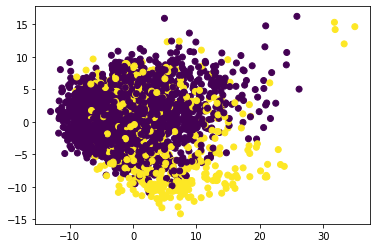

In [107]:
from sklearn.decomposition import PCA
X_NMF = PCA(n_components=2).fit_transform(model)
plt.scatter(model[:,0],model[:,1],c=target)

In [97]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN,SMOTE
from sklearn.feature_selection import SelectFromModel

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.1,shuffle=True)

ada = ADASYN(sampling_strategy='minority')
X_train, y_train = ada.fit_resample(X_train,y_train)

model = LogisticRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       248
           1       0.95      0.91      0.93        57

    accuracy                           0.97       305
   macro avg       0.96      0.95      0.96       305
weighted avg       0.97      0.97      0.97       305



In [ ]:
skf = StratifiedKFold(n_splits=5)

In [87]:
X_new = SelectFromModel(model,max_features=80).fit_transform(data,target)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
data.describe()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1174,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183
count,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,...,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000
mean,8.839738,7.675392,31.219955,15.923754,8.193010,8.489977,8.026194,16.534062,7.173958,29.833141,...,7.930203,7.721777,7.531157,9.585454,7.887061,81.367312,257.447141,8.928359,22.060488,9.065545
std,2.449841,0.374261,16.173660,100.799888,1.038038,0.943135,0.588231,64.338377,0.357899,13.775361,...,0.482159,0.867464,0.459145,1.431578,0.756991,170.459232,111.263027,3.792555,151.371369,1.161205
min,6.274120,6.524659,7.131753,7.177756,6.741713,6.983738,6.729693,6.868114,6.274120,8.736427,...,6.274120,6.274120,6.274120,6.794285,6.383825,7.713066,7.753002,6.962377,6.704153,6.763480
25%,7.917915,7.420765,20.217399,9.901193,7.770752,8.129880,7.724047,9.941665,6.923405,20.047709,...,7.614961,7.301303,7.245207,8.702801,7.390387,29.470253,179.976799,8.271670,10.046681,8.190376
50%,8.440867,7.661372,29.470253,11.153140,8.090420,8.430934,7.988912,11.323305,7.146528,27.738883,...,7.865176,7.634782,7.508201,9.326148,7.726217,41.669409,240.164605,8.602066,11.734602,8.871970
75%,9.022656,7.894680,38.622678,13.350419,8.472082,8.721964,8.276897,13.606994,7.387790,36.976892,...,8.192381,8.017692,7.772970,10.046681,8.203915,66.150837,312.738479,9.015278,15.543100,9.719155
max,76.173570,11.096940,129.344959,3215.213719,49.920509,49.048609,22.593519,3017.031921,9.686566,209.703575,...,12.007020,29.824640,10.848579,27.088744,14.857046,3921.622051,943.273473,148.386196,7236.077341,17.441703


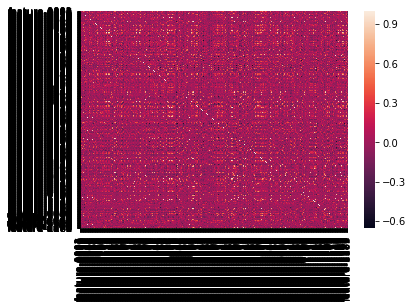

In [78]:
# calculate the correlation matrix
corr = data.corr()

import seaborn as sns
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [3]:
data.head()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183,label
Sample_0001_Non-LCa,8.500863,8.001125,28.747845,9.941665,7.589673,8.679772,7.804306,13.542269,7.080440,21.135280,...,7.652475,7.600870,9.076837,7.395667,85.931773,303.242753,8.960097,12.928830,8.549728,0
Sample_0002_Non-LCa,9.941665,8.064157,15.727566,12.098506,8.853987,9.100630,8.214993,13.105117,6.445316,14.939257,...,6.763480,7.455388,8.444764,7.232966,73.140879,179.976799,8.814242,19.714151,8.259411,0
Sample_0003_LCa,8.468764,7.945632,35.426976,10.311829,7.648110,8.761466,7.772970,16.314979,7.489190,27.411820,...,7.326394,7.757589,8.493571,9.578714,30.190762,175.608275,8.084079,11.171948,8.751308,1
Sample_0004_Non-LCa,8.519110,7.428407,13.942995,14.085761,8.174631,8.049387,8.358423,12.596805,7.715340,21.532998,...,7.860627,8.256623,9.406866,8.393852,20.942159,269.352082,8.410467,9.382674,8.185181,0
Sample_0005_Non-LCa,7.695362,7.969229,33.991915,11.822439,8.940175,8.101449,7.306996,9.092907,6.889294,39.199841,...,8.303378,7.450536,11.606221,10.392308,18.084913,367.711493,7.670650,11.869036,13.737306,0


In [4]:
# All positive data
data[(data < 0).all(1)]

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183,label


In [81]:
from sklearn.decomposition import KernelPCA, PCA,NMF
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X_norm = MinMaxScaler().fit_transform(data.iloc[:,0:-1].apply(np.log))

X_PCA_ = PCA(n_components=20).fit(X_norm)
X_KPCA_ = KernelPCA(n_components=20,kernel='rbf').fit(X_norm)
X_NMF_ = NMF(n_components=2).fit(X_norm)

X_PCA = X_PCA_.transform(X_norm)
X_KPCA = X_KPCA_.transform(X_norm)
X_NMF = X_NMF_.transform(X_norm)



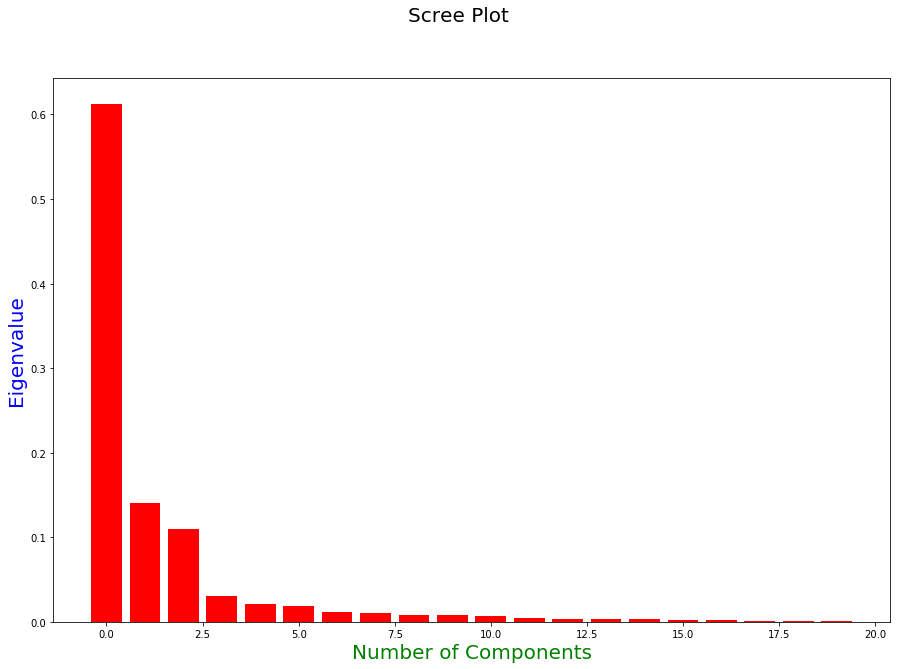

In [75]:
S = X_KPCA_.lambdas_
eigvals = S**2 / np.sum(S**2) 

plt.style.use(['seaborn-colorblind'])
fig,ax = plt.subplots(figsize=(15,10))
plt.style.use(['seaborn-colorblind'])
title = fig.suptitle('Scree Plot', fontsize=20,)
label_x = plt.xlabel('Number of Components', fontsize=20)
label_y = plt.ylabel('Eigenvalue', fontsize=20)
plt.setp(title, color='black') 
plt.setp(label_x, color='g') 
plt.setp(label_y, color='b') 
plt.bar(range(len(X_KPCA_.lambdas_)),eigvals,color='r')
plt.savefig
plt.show()

In [80]:
i = 0
j = 0
while i < 0.95:
    i += eigvals[j]
    j += 1
j

8

In [6]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


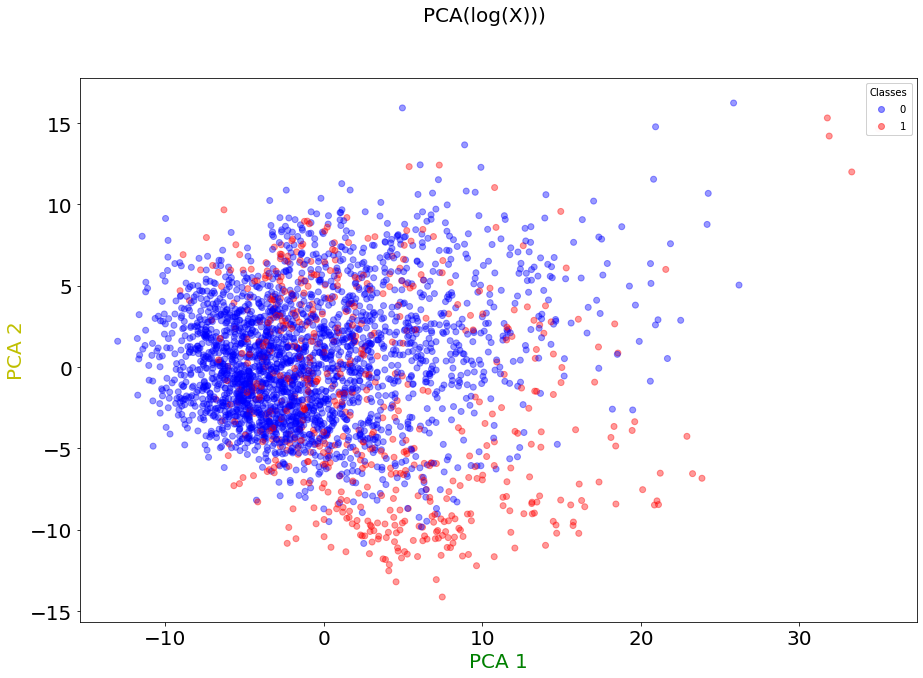

In [109]:
fig,ax = plt.subplots(figsize=(15,10))
plt.style.use(['seaborn-colorblind'])
title = fig.suptitle('PCA(log(X)))', fontsize=20,)
label_x = plt.xlabel('PCA 1', fontsize=20)
label_y = plt.ylabel('PCA 2', fontsize=20)
plt.setp(title, color='black') 
plt.setp(label_x, color='g') 
plt.setp(label_y, color='y') 
scatter = ax.scatter(X_NMF[:,0],X_NMF[:,1],c=target,cmap='bwr',alpha=0.4)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('PCA.png',dpi=300)
plt.show()

In [14]:
data_lca = data[data['label'] == 1]
data_non = data[data['label'] == 0]
data_lca_ = data_lca.describe()
data_non_ = data_non.describe()

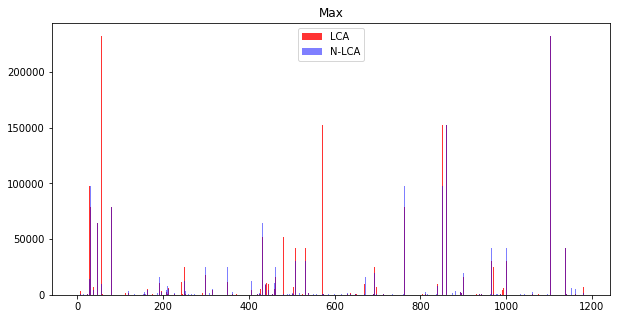

In [20]:
fig,ax = plt.subplots(figsize=(10,5))
plt.title('Max')
plt.bar(range(data_lca.shape[1]),data_lca_.iloc[-1,:],label='LCA',color='r',alpha=0.8)
plt.bar(range(data_lca.shape[1]),data_non_.iloc[-1,:],label='N-LCA',color='b',alpha=0.5)
plt.legend()
plt.savefig('min_change.png',dpi=300)
plt.show()

In [143]:
np.mean([0.9147540983606557, 0.9146141215106732, 0.9293924466338259, 0.9261083743842364, 0.9392446633825944])

0.9248227408543972

In [139]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=6000000)
selector.fit_transform(data.iloc[:,0:-1])

array([[ 1667.7385849 ,   730.60800783, 25172.32827702, ...,
        14023.70400621,  1331.19217901, 10899.86532139],
       [ 1117.7011645 ,  5192.81196468, 15579.71850459, ...,
         7740.0691158 ,  7236.07734144,  4537.80418031],
       [  380.31069337,  4221.13135959, 10181.48832217, ...,
         4537.80418031,  9512.6325164 ,  6759.71221132],
       ...,
       [  453.22885394,  2030.98563454, 19451.76343401, ...,
         7740.0691158 ,  3921.6220505 , 11776.63923334],
       [  110.67870068,   470.13633953, 21787.99214655, ...,
        10899.86532139,  6332.11299992, 11776.63923334],
       [  943.27347281,  5192.81196468, 19451.76343401, ...,
        12797.19819396,  2528.24715689,  8877.77322072]])

In [24]:
measure = np.abs(np.std(data_lca) - np.std(data_non))

In [28]:
value = [(x - min(measure))/(max(measure) - min(measure)) for x in measure]

In [31]:
value = pd.Series(value)

In [39]:
data.iloc[:,value[value > 0.05].index]

,feature-0014,feature-0029,feature-0048,feature-0057,feature-0061,feature-0080,feature-0273,feature-0282,feature-0304,feature-0336,...,feature-0934,feature-0972,feature-0982,feature-1002,feature-1054,feature-1073,feature-1088,feature-1105,feature-1136,feature-1137
Sample_0001_Non-LCa,10.504247,643.661923,25172.328277,526.530771,421.616343,6332.113000,5923.636705,215.350500,15579.718505,19451.763434,...,12797.198194,38.07320,2381.824951,3921.622051,151.847709,51566.010063,159.191944,152399.215113,1836.073925,2842.786346
Sample_0002_Non-LCa,12.392570,863.312891,15579.718505,699.243150,487.995814,10899.865321,3215.213719,322.937786,30177.155110,17426.343930,...,21787.992147,42.99427,2675.909520,6332.113000,1454.212060,64155.516126,184.512439,152399.215113,1520.100091,2528.247157
Sample_0003_LCa,13.737306,1117.701164,10181.488322,132.276439,233.496656,51566.010063,901.800469,59.966780,7236.077341,6332.113000,...,8877.773221,42.99427,10899.865321,25172.328277,2842.786346,97451.082712,80.927290,152399.215113,2030.985635,21787.992147
Sample_0004_Non-LCa,13.350419,2842.786346,21787.992147,175.608275,526.530771,25172.328277,1391.284040,99.340577,15579.718505,17426.343930,...,10181.488322,47.42284,5923.636705,12797.198194,984.193678,78654.362393,189.249340,152399.215113,4852.047676,7236.077341
Sample_0005_Non-LCa,13.044672,901.800469,12797.198194,179.976799,144.962771,30177.155110,2252.991761,55.550968,10899.865321,8877.773221,...,17426.343930,20.04771,5923.636705,7740.069116,593.611671,97451.082712,49.920509,152399.215113,1931.978959,8308.734807
Sample_0006_Non-LCa,14.156836,1391.284040,19451.763434,209.703575,221.166944,11776.639233,5923.636705,63.547596,21787.992147,17426.343930,...,30177.155110,23.27160,3215.213719,5545.812159,44.397780,51566.010063,61.140045,152399.215113,3662.829238,2842.786346
Sample_0007_Non-LCa,12.928830,8877.773221,7740.069116,618.348622,2252.991761,30177.155110,1520.100091,303.242753,1070.924591,2030.985635,...,19451.763434,61.14004,8308.734807,10181.488322,406.817521,78654.362393,699.243150,232198.513653,15579.718505,12797.198194
Sample_0008_Non-LCa,17.080535,794.947979,21787.992147,87.753678,303.242753,25172.328277,2030.985635,85.931773,15579.718505,19451.763434,...,14023.704006,31.78427,4852.047676,7740.069116,91.402416,78654.362393,95.204660,152399.215113,2381.824951,5923.636705
Sample_0009_Non-LCa,25.614552,1117.701164,25172.328277,189.249340,141.838948,17426.343930,2675.909520,53.569755,21787.992147,30177.155110,...,12797.198194,20.39173,3921.622051,6332.113000,344.643818,78654.362393,45.105766,152399.215113,2528.247157,5923.636705
Sample_0010_Non-LCa,11.323305,1750.457384,30177.155110,1272.846143,159.191944,10899.865321,4221.131360,46.635586,17426.343930,25172.328277,...,14023.704006,13.87389,3426.570911,3921.622051,247.250630,78654.362393,45.105766,152399.215113,3662.829238,5923.636705


In [18]:
data_lca.describe()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183,label
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,...,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.0
mean,9.045782,7.717850,27.537346,30.039512,8.210921,8.314113,7.957740,25.291404,7.148903,26.062191,...,7.716886,7.440114,10.029581,7.821140,98.700011,303.412392,8.892543,42.599721,9.054802,1.0
std,3.689677,0.433192,13.753127,225.432611,0.902282,0.485814,0.505678,136.627474,0.388362,12.408271,...,0.560560,0.461698,1.623848,0.666864,212.493133,149.362078,3.235892,329.465962,1.258120,0.0
min,6.274120,6.554827,7.131753,7.393043,6.988844,6.983738,6.752822,7.254423,6.274120,9.159811,...,6.274120,6.274120,7.084493,6.659471,10.002944,7.753002,7.050478,6.820777,6.763480,1.0
25%,7.830372,7.435840,17.229517,9.811262,7.753002,7.990149,7.637557,10.372043,6.889294,16.967691,...,7.322350,7.147417,8.916281,7.403791,30.589222,198.980660,8.265831,11.171948,8.142695,1.0
50%,8.341513,7.708553,26.039906,10.782036,8.042004,8.278327,7.895840,12.759632,7.100600,23.271599,...,7.658077,7.395667,9.663396,7.724047,47.422842,273.372321,8.622836,13.671946,8.803212,1.0
75%,9.119143,7.940902,35.426976,12.759942,8.402068,8.573300,8.214310,16.967691,7.377469,31.784270,...,8.061786,7.706386,10.840270,8.080891,93.232516,367.711493,9.046198,21.733807,9.736289,1.0
max,76.173570,11.096940,99.340577,3215.213719,15.821440,11.171948,11.209647,3017.031921,9.686566,82.573232,...,9.842943,9.770861,16.314979,13.286459,3921.622051,943.273473,85.931773,7236.077341,15.455028,1.0


In [84]:
desc = data.describe()

In [91]:
features = desc.loc['std',:]

In [95]:
features[features > 2500]

feature-0031     3929.239190
feature-0035     2827.835841
feature-0048     7455.888800
feature-0057     4262.529775
feature-0061     8602.953564
feature-0080    10878.806155
feature-0082     3681.472712
feature-0158     4154.518904
feature-0300     3022.006618
feature-0304     8614.328970
feature-0336     7680.585956
feature-0351     2694.061933
feature-0359     3706.899956
feature-0411     2860.072921
feature-0430    19914.960040
feature-0433     4467.339735
feature-0462     3213.964371
feature-0500     3338.354036
feature-0510     4025.277878
feature-0533     3569.135217
feature-0573     4782.374511
feature-0598     9552.415302
feature-0689    12023.202778
feature-0764    12757.361438
feature-0812    23464.065960
feature-0853    19997.684972
feature-0856     3518.318164
feature-0862    25995.129010
feature-0870    10798.981018
feature-0934     6073.630359
feature-0938     3938.231672
feature-0967     5744.236514
feature-0982     2907.216296
feature-1002     5621.981425
feature-1054  

In [20]:
# Gather descriptors
data_lca_desc = data_lca.describe()
data_non_desc = data_non.describe()

In [37]:
min_max_vec = np.abs(data_lca_desc.iloc[-1,0:-1] - data_non_desc.iloc[-1,0:-1])

In [38]:
min_max_vec

feature-0001       47.065000
feature-0002        1.441417
feature-0003       30.004382
feature-0004     3159.662751
feature-0005       34.099069
feature-0006       37.876661
feature-0007       11.383872
feature-0008     2546.895582
feature-0009        0.699660
feature-0010      127.130343
feature-0011        6.332310
feature-0012        4.169259
feature-0013        0.584959
feature-0014    26961.941391
feature-0015      206.265842
feature-0016        3.175130
feature-0017       43.234900
feature-0018        0.250737
feature-0019      927.681289
feature-0020        1.359076
feature-0021       45.899270
feature-0022       97.974727
feature-0023       14.266940
feature-0024      340.317000
feature-0025      174.727328
feature-0026        4.845367
feature-0027        0.214262
feature-0028        0.117005
feature-0029    83427.378706
feature-0030       22.875222
                    ...     
feature-1154     5739.124266
feature-1155        0.128643
feature-1156        0.276875
feature-1157  

In [39]:
from sklearn.preprocessing import MinMaxScaler
scales = MinMaxScaler().fit_transform(min_max_vec.values.reshape(-1,1))

In [52]:
result = np.where(scales > 0.07)
data.iloc[:,result[0]]

33

In [55]:
data_new = pd.read_csv("norm_data__non_log.txt",sep='\t').T
data_new.iloc[:,result[0]]
data_new.to_csv("min_max_featureselect.csv")

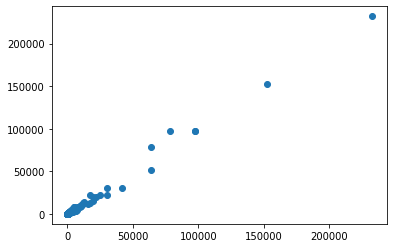

In [23]:
plt.plot(data_lca_desc.iloc[6,:],data_non_desc.iloc[,:],'o')

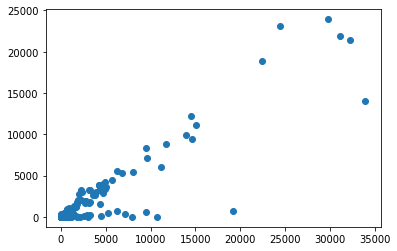

In [26]:
# Plotting against the mean
plt.scatter(data_lca_desc.iloc[1,:],data_non_desc.iloc[1,:])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


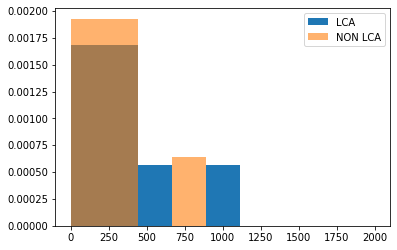

In [44]:
bins = np.linspace(0, 2000, 10)
plt.hist(data_lca_desc['feature-1180'], bins, alpha=1, normed=True, label='LCA')
plt.hist(data_non_desc['feature-1180'], bins, alpha=0.6, normed=True, label='NON LCA')
plt.legend(loc='upper right')
plt.show()